# Experiments with a Perceptron Model

## Data Set
For this simple example, we will use a handcrafted dataset. This dataset is a 2x6 (two input vectors with six features) associated with one output vector. It is crafted such that we have two arrays where numbers above 3 indicate activation (belong to class 1) and numbers below 3 indicate no activation (belong to class 0). 0.75 is a "bias" factor. 

In [33]:
import numpy as np

# Create an artificial dataset
x1 = np.array(np.arange(0.1,0.7,0.1))
X1 = np.exp(x1 * 1.1 + 0.75)
x2 = np.array(np.arange(0.6,1.2,0.1))
X2 = np.exp(x2 * 0.4 + 0.75)

#From the output, lets use 3 as threshold; Value>3 = class 1, value<3 = class 0
X = np.array([X1,X2])
Y = np.array([0,1])#,0,1,1,1])

print(X)
print(Y)

[[2.36316069 2.63794446 2.94467955 3.28708121 3.66929667 4.0959554 ]
 [2.69123447 2.80106583 2.9153795  3.03435839 3.15819291 3.28708121]]
[0 1]


In [20]:
#ValueError: operands could not be broadcast together with shapes (2,) (1,6) 

In [34]:
x1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [35]:
X1

array([2.36316069, 2.63794446, 2.94467955, 3.28708121, 3.66929667,
       4.0959554 ])

In [47]:
Y = Y.reshape((Y.shape[0], 1))

In [48]:
Y

array([[0],
       [1]])

### Logistic (Sigmoid) Function
Exponential values for moderately large numbers tend to overflow. So np.clip is used here to limit the values of the signal between -500 and 500. Since e^x is between 0 and 1, the error in using this clip is low. Additionally, I am using logistic (sigmoid) function $\frac{1}{1+e^-z}$. This can also be expressed as $\frac{e^z}{1+e^z}$. NOTE: you could call sklearn.linear_model.LogisticRegressionCV(), but it's always good to try and write it yourself so you understand what the function does. 

In [49]:
# Creating a numerically stable logistic s-shaped definition to call
def sigmoid(x):
    x = np.clip(x, -500, 500)
    if x.any()>=0:
        return 1/(1 + np.exp(-x))
    else:
        return np.exp(x)/(1 + np.exp(x))

### Initialize Parameters
Because this there are not hidden layers, the second dimension is always assigned to 1. std is set to ${1^{-1}}$ to ensure values are between zero and 1. If zeros, there's no reason to multiply with std.

In [50]:
# define the dimentions and set the weights to random numbers
def init_parameters(dim1, dim2=1,std=1e-1, random = True):
    if(random):
        return(np.random.random([dim1,dim2])*std)
    else:
        return(np.zeros([dim1,dim2]))

### Forward Propagation
Here, I am assuming a single layered network. Note that event with single layered network, the layer itself can have multiple nodes. Also, I am using vectorized operations here i.e not using explicit loops. This helps in processing multiple inputs.

In [51]:
# Single layer network: Forward Prop
# Passed in the weight vectors, bias vector, the input vector and the Y
def fwd_prop(W1,bias,X,Y):

    Z1 = np.dot(W1,X) + bias # dot product of the weights and X + bias
    A1 = sigmoid(Z1)  # Uses sigmoid to create a predicted vector

    return(A1)

### Backpropagation

Here I am calculating the loss/cost. The loss function here is a logistic loss function and in this case of binary classification, this is also a cross-entropy loss

Cross Entropy loss for a single datapoint = $\sum_{i=1}^{c} y_i*log (\hat y_i) $
For binary classification: $y_i*log (\hat y_i) + (1-y_i)*log(1-\hat y_i) $

Lastly, the gradients W1 and B1 are calculated and returned along with the total cost/loss

In [52]:
#Single layer network: Backprop

def back_prop(A1,W1,bias,X,Y):

    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
   
    # Cross entropy loss function
    cost = (-1/m)*np.sum(Y*np.log(A1) + (1-Y)*np.log(1-A1)) # cost of error
    dZ1 = A1 - Y                                            # subtract actual from pred weights
    dW1 = (1/m) * np.dot(dZ1, X.T)                          # calc new weight vector
    dBias = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)  # calc new bias vector
    
    grads ={"dW1": dW1, "dB1":dBias} # Weight and bias vectors after backprop
    
    return(grads,cost)

### Gradient Descent
This function performs a simple gradient descent. After completing a round of forward propagation and backward propagation, the weights are updated based on the learning rate and gradient. The loss for that iteration is recorded in the loss_array. The function returns the final parameters W1 (updated weight vector), B1 (bias) and the loss array after running for given number of iterations.

In [53]:
def run_grad_desc(num_epochs,learning_rate,X,Y,n_1):
    
    n_0, m = np.shape(X)
    
    W1 = init_parameters(n_1, n_0, True)
    B1 = init_parameters(n_1,1, True)
    
    loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
    
    for i in np.arange(num_epochs):
        A1 = fwd_prop(W1,B1,X,Y)                # get predicted vector
        grads,cost = back_prop(A1,W1,B1,X,Y)    # get gradient and the cost from BP 
        
        W1 = W1 - learning_rate*grads["dW1"]    # update weight vector LR*gradient*[BP weights]
        B1 = B1 - learning_rate*grads["dB1"]    # update bias LR*gradient[BP bias]
        
        loss_array[i] = cost                    # loss array gets cross ent values
        
        parameter = {"W1":W1,"B1":B1}           # assign 
    
    return(parameter,loss_array)

In [54]:
np.shape(X)

(2, 6)

### Running the Experiment
Now that all of the helper functions are created we can run gradient descent on the handcrafted dataset that I had created earlier. Note that I am using n_1 = 1, therefore, I am just using one output node.

In [63]:
num_epochs = 1000
learning_rate = 0.001
params, loss_array = run_grad_desc(num_epochs,learning_rate,X,Y,n_1= 1 )
print(loss_array[num_epochs-1])

0.09074729365986313


Here the boundary of separation is 0. That is values less than 0 belong to class 0 and greater than 0 belong to class 1.
Key thing to note here is that the data we generated was a linearly separable data and hence there are many possible options for the separting plane. Unlike SVM, logistic regression does not necessarily find the best separting plane, but finds a locally optimum solution that separates the classes of data. 

### Plot of the loss array
Here we want to ensure that the loss value per iteration is going down. However, note that the plot has not curved to reach stablizing value i.e we can run the algorithms more times to get a lower loss. However, this is not needed as the current value of the parameters can classify the input data accurately.

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0) #Set default plot sizes
plt.rcParams['image.interpolation'] = 'nearest' #Use nearest neighbor for rendering

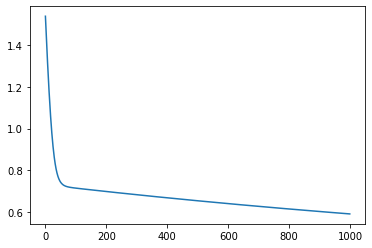

In [10]:
plt.plot(loss_array)

### Another example with handcrafted dataset
values below 0.5 are assigned to class 1 and values above are set to class 0.

In [11]:
X = np.array([[0.25,0.75],[0.1,0.9],[0.3,0.8],[0.8,0.25],[0.9,0.2],[0.7,0.1]])
X = np.array([[0.11,0.12],[0.05,0.1],[0.15,0.11],[0.8,0.9],[0.9,0.8],[0.85,0.95]])
X = X.T #Had to do this because, I did not declare the X array as (#dimension * # Datapoints)
Y = np.array([1,1,1,0,0,0])
print(X)

[[0.11 0.05 0.15 0.8  0.9  0.85]
 [0.12 0.1  0.11 0.9  0.8  0.95]]


In [12]:
params, loss_array = run_grad_desc(100000,0.01,X,Y,n_1= 1 )

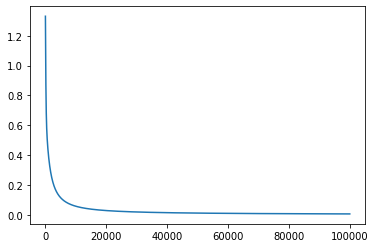

In [13]:
plt.plot(loss_array)

## Things to Consider
How would you stop this perceptron from overfitting?
How would you convert this to a multi-layer Neural Network for a complex problem